# Lab 1 (Heart Disease Classification)
# Name: Srinibas Masanta
# Roll Number: 202318054

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
df = pd.read_csv("heart_disease_uci.csv")

In [215]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [216]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


In [217]:
print('Observations from summary statistics'.upper())

print(f"1. There are no heart diseases found in the 25% of the patients with an average of age {df.describe().loc['25%', 'age']}.")
print(f"2. There is mild presence of heart diseases found in the 50% of the patients with an average of age {df.describe().loc['50%', 'age']}.")
print(f"3. There is moderate presence of heart diseases found in the 75% of the patients with an average of age {df.describe().loc['75%', 'age']} or more.")

OBSERVATIONS FROM SUMMARY STATISTICS
1. There are no heart diseases found in the 25% of the patients with an average of age 47.0.
2. There is mild presence of heart diseases found in the 50% of the patients with an average of age 54.0.
3. There is moderate presence of heart diseases found in the 75% of the patients with an average of age 60.0 or more.


In [218]:
print('Number of rows in the dataset : ',df.shape[0])
print('Number of columns in the dataset : ',df.shape[1])

Number of rows in the dataset :  920
Number of columns in the dataset :  16


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


### Observations

- The dataset consists of **920 entries**, representing data from 920 individuals.
- There are a total of **16 columns** in the dataset. These include an identifier (`id`), demographic and categorical information such as `sex`, `dataset` (location of the patient), and medical parameters.
- The target variable `num` indicates the severity of heart disease, with values ranging from **0 to 4**, where 0 represents no heart disease and 1-4 represent increasing severity.
- The dataset contains **13 features** related to medical parameters (excluding `id` and `dataset`), which are potential predictors of heart disease severity. These features include attributes such as `age`, `sex`, `cp` (chest pain type), `trestbps` (resting blood pressure), `chol` (serum cholesterol), and more.

## EDA

In [222]:
# List of numerical columns
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

df_continuous = df[num_cols].fillna(df[num_cols].median())  # Impute with median

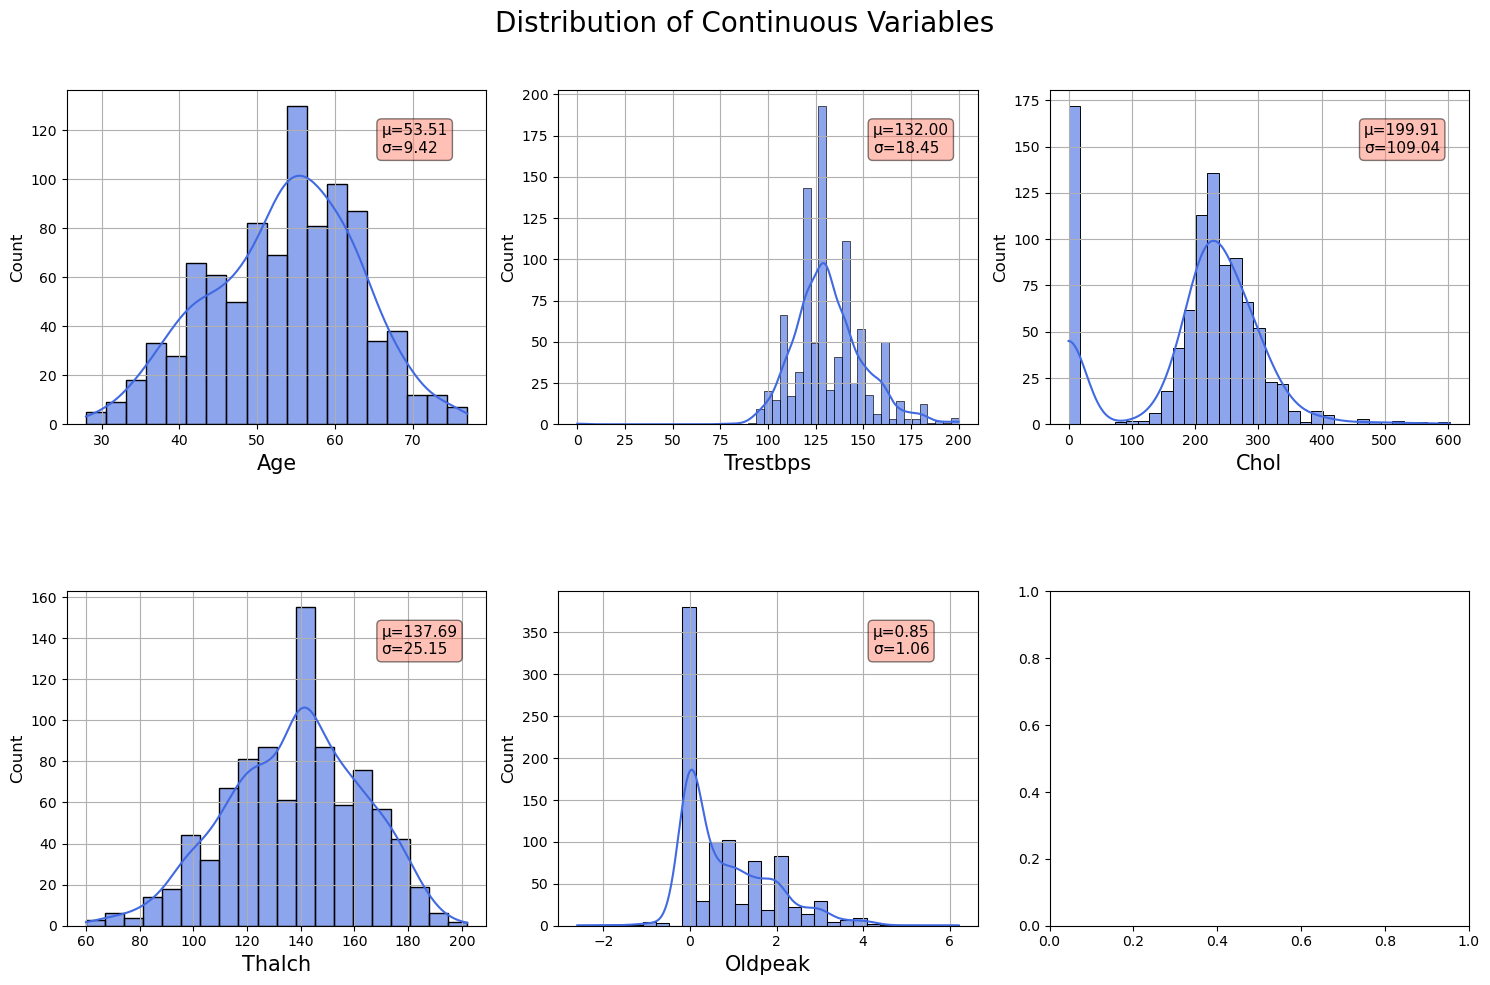

In [223]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3

    graph = sns.histplot(df_continuous[col], kde=True, ax=ax[x, y], color='royalblue', alpha=0.6)
    
    ax[x, y].set_xlabel(col.capitalize(), fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].grid(True)
    
    # Add statistical text box
    textstr = f'μ={df_continuous[col].mean():.2f}\nσ={df_continuous[col].std():.2f}'
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=11,
                  verticalalignment='top', bbox=dict(boxstyle='round', facecolor='#ff826e', alpha=0.5))

plt.tight_layout()
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.subplots_adjust(top=0.9, hspace=0.5)
plt.show()

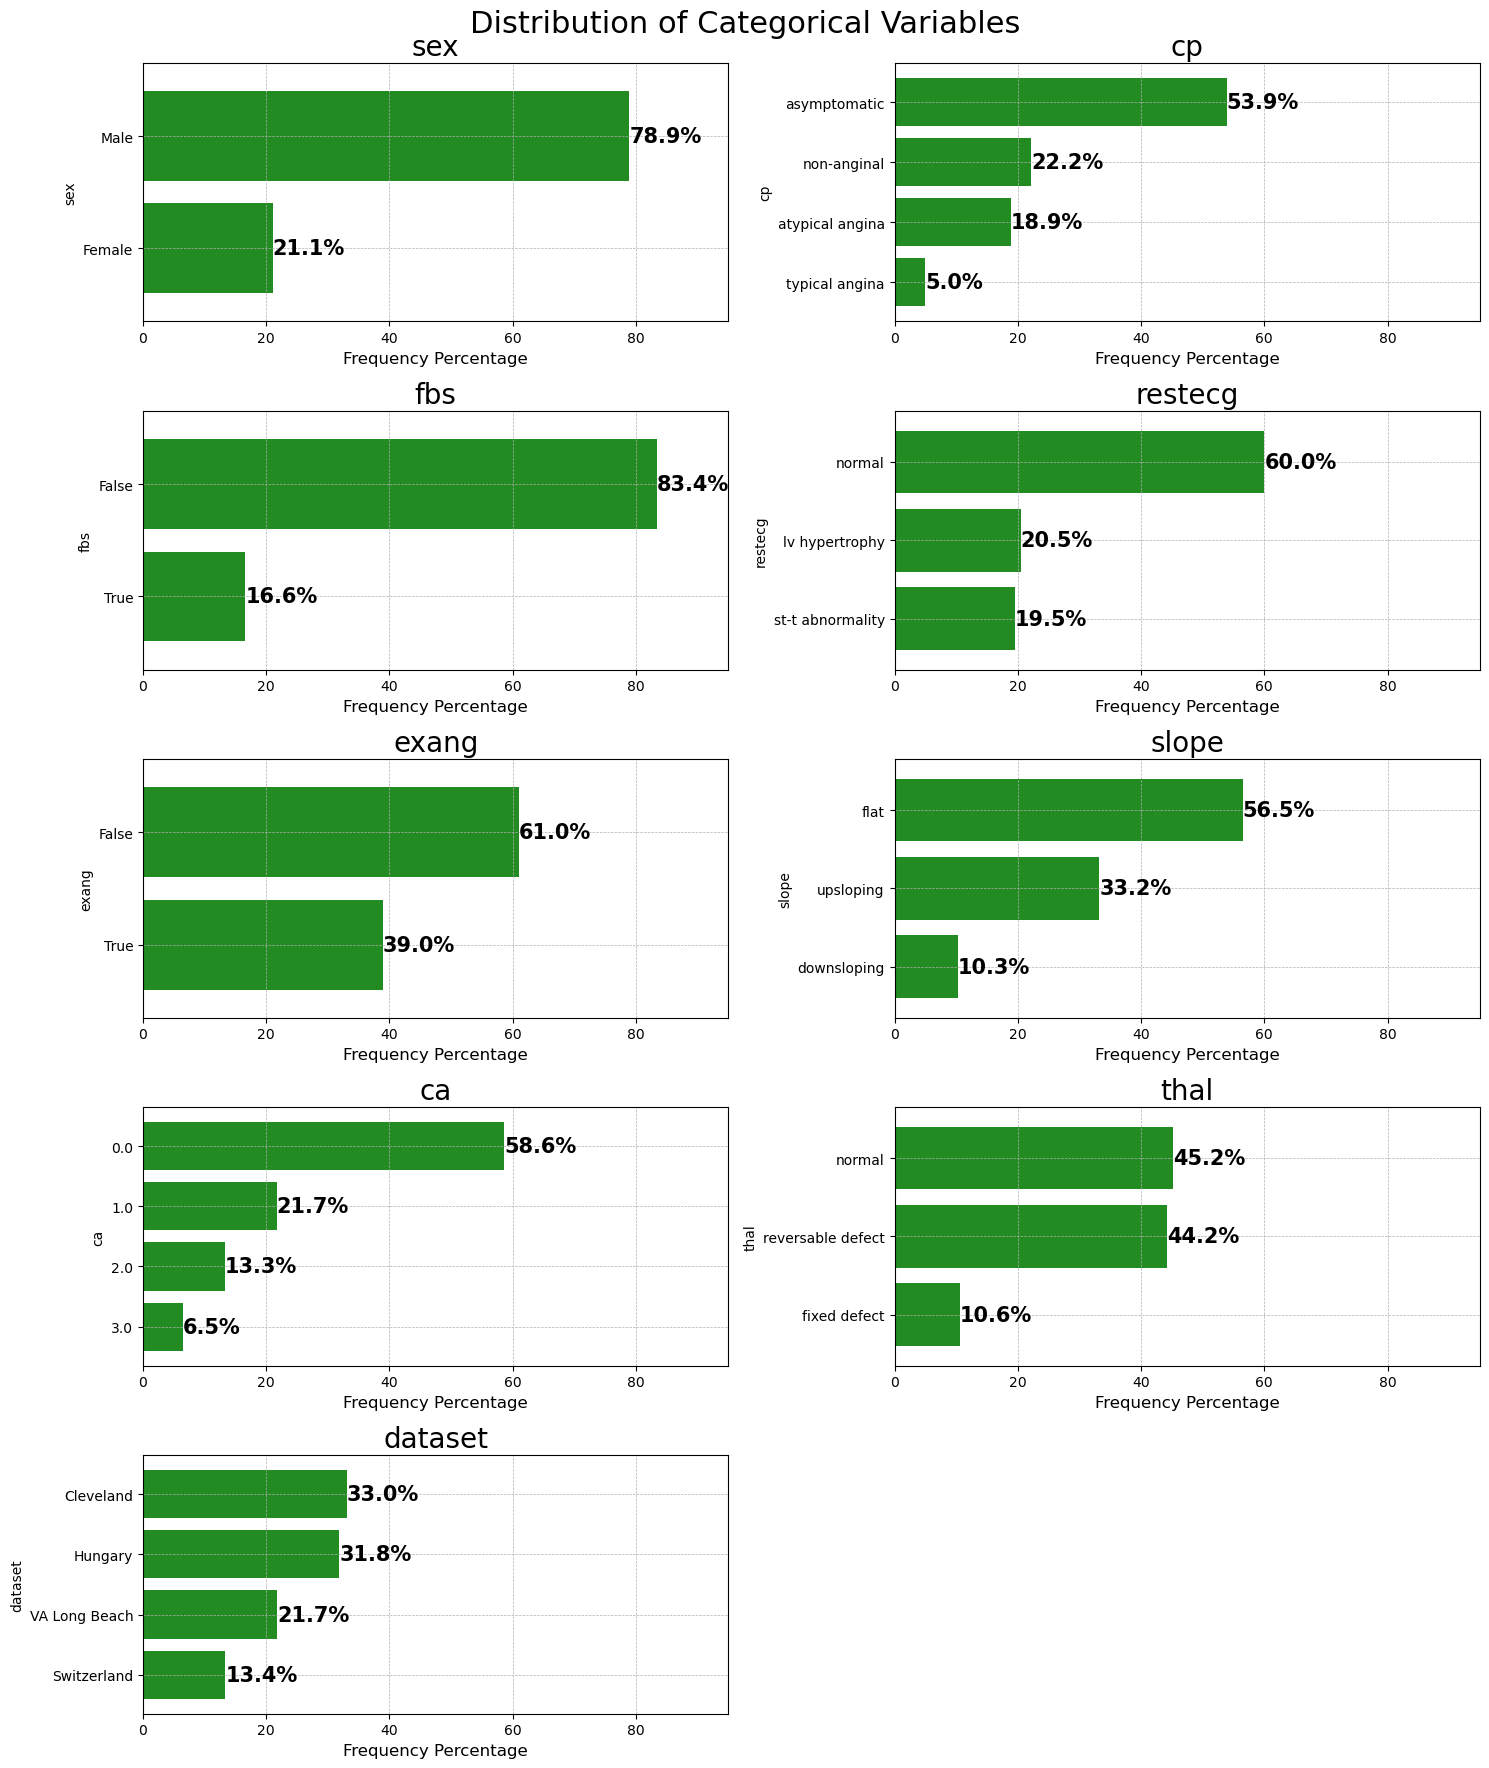

In [224]:
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal','dataset']

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(cat_cols):
    row = i // 2
    col_idx = i % 2
    
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()
    
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='forestgreen')
    
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)
    ax[row, col_idx].grid(True, which='both', linestyle='--', linewidth=0.5)

ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

The above plot provides a visual representation of the distribution of categorical variables in the dataset. Specifically, it shows bar charts for each categorical feature, displaying the frequency percentage of each category within the feature.

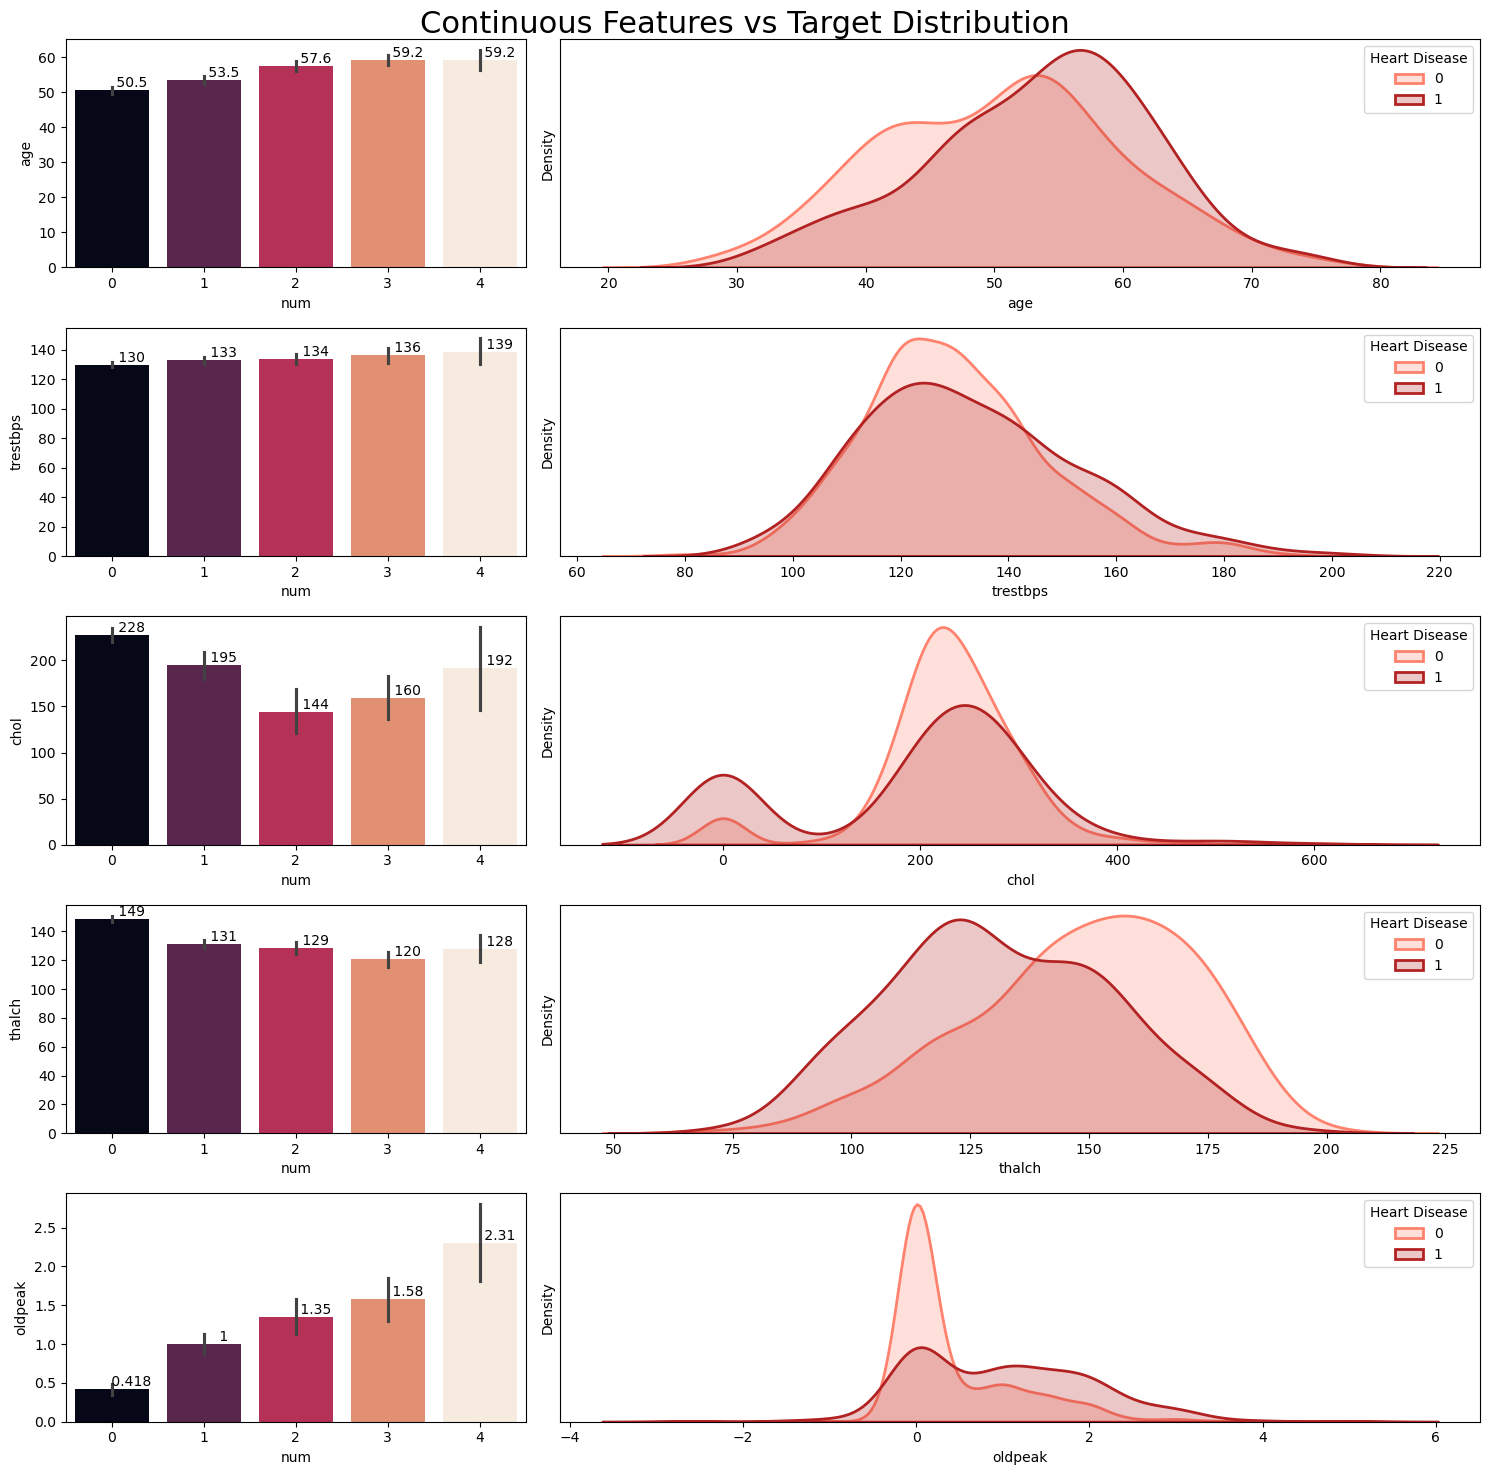

In [226]:
sns.set_palette(['#ff826e', 'firebrick'])

fig, ax = plt.subplots(len(num_cols), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

for i, col in enumerate(num_cols):
    graph = sns.barplot(data=df, x="num", y=col, hue="num", ax=ax[i,0], palette='rocket', dodge=False)
    
    sns.kdeplot(data=df[df["num"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df["num"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')
    
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
    ax[i,0].get_legend().remove()

plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

The above plot provides:

1. **Mean Comparison**: Bar plots show the mean values of continuous features across the target categories (`num`), indicating how each feature differs between those with and without heart disease.

2. **Distribution Insight**: KDE plots reveal the distribution of each feature for both categories, highlighting overlaps or separations in the data.

3. **Feature Importance**: The combination of mean values and distribution helps in identifying which features might be significant in predicting heart disease.

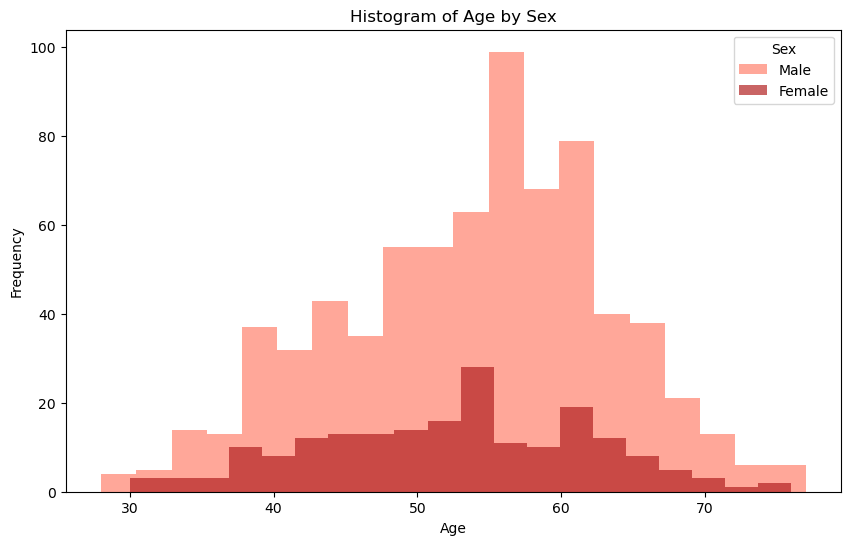

In [228]:
fig, ax = plt.subplots(figsize=(10, 6))

for sex in df['sex'].unique():
    ax.hist(df[df['sex'] == sex]['age'], bins=20, alpha=0.7, label=sex)

ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Age by Sex')
ax.legend(title='Sex')

plt.show()

In [229]:
# Check for missing values
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [230]:
from sklearn.impute import SimpleImputer

# Fill missing values with the median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

In [231]:
# Fill missing categorical values with the most frequent value
cat_cols = df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

To handle missing data in the dataset, we employed the `SimpleImputer` from scikit-learn. For numerical columns, we used the median strategy to fill missing values, as the median is less sensitive to outliers and provides a more robust estimate for central tendency. For categorical columns, we filled missing values with the most frequent category, ensuring that the imputation aligns with the majority class and maintains the integrity of the data. This approach helps to preserve the dataset's overall distribution and prevents the loss of valuable information during analysis.

In [233]:
# Check for missing values
print(df.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [234]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in cat_cols:
    df[column] = label_encoder.fit_transform(df[column])


After handling missing values, we encoded the categorical variables using `LabelEncoder`. This step converts the categorical data into numerical format, assigning each unique category a numerical value. This encoding is essential for machine learning algorithms that require input data to be in numerical form, allowing them to process and analyze the categorical features effectively.

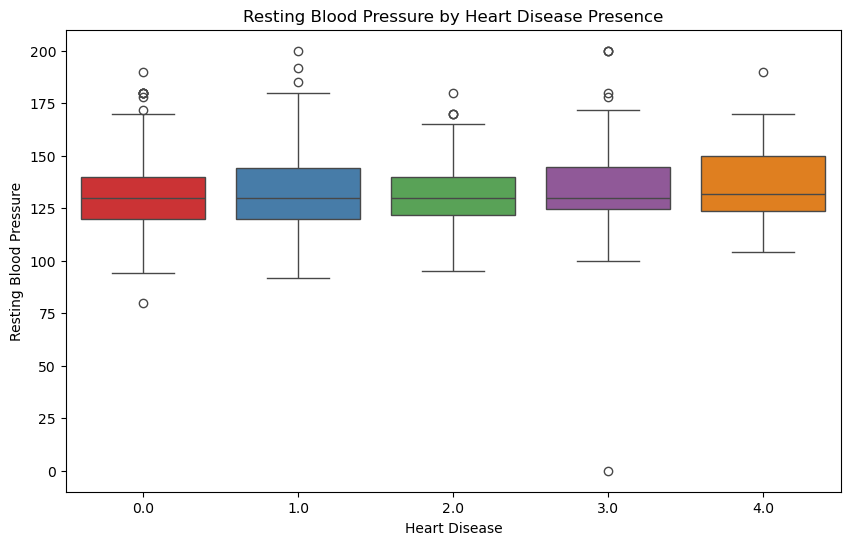

In [236]:
# Boxplot of age vs trestbps (resting blood pressure)
plt.figure(figsize=(10, 6))
sns.boxplot(x='num', y='trestbps', data=df, palette='Set1')
plt.title('Resting Blood Pressure by Heart Disease Presence')
plt.xlabel('Heart Disease')
plt.ylabel('Resting Blood Pressure')
plt.show()

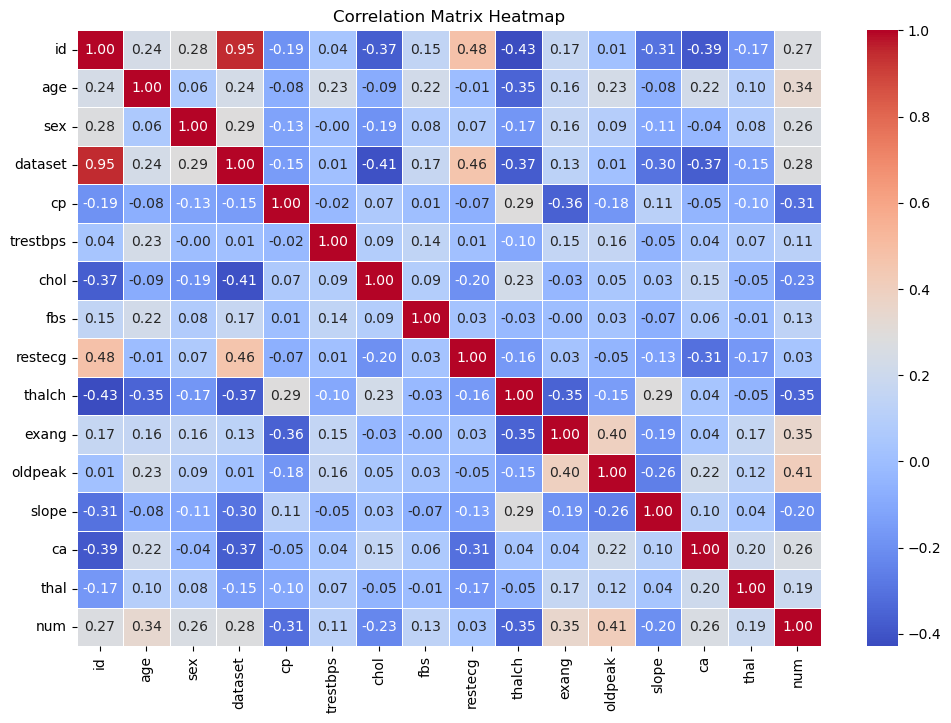

In [237]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [238]:
from sklearn.preprocessing import StandardScaler

# Separate the features and target variable
X = df.drop('num', axis=1)
y = df['num']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

## Logistic Regression

In [240]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [241]:
# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.5797101449275363

Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.92      0.80       120
         1.0       0.48      0.49      0.48        78
         2.0       0.31      0.12      0.17        34
         3.0       0.29      0.22      0.25        36
         4.0       0.00      0.00      0.00         8

    accuracy                           0.58       276
   macro avg       0.36      0.35      0.34       276
weighted avg       0.52      0.58      0.54       276



## Polynomial Logistic Regression

In [243]:
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [244]:
# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Split the polynomial features into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model on polynomial features
log_reg_poly = LogisticRegression(random_state=42)
log_reg_poly.fit(X_train_poly, y_train_poly)

# Make predictions
y_pred_poly = log_reg_poly.predict(X_test_poly)

# Evaluate the model
print("Polynomial Logistic Regression Accuracy:", accuracy_score(y_test_poly, y_pred_poly))
print("\nClassification Report:\n", classification_report(y_test_poly, y_pred_poly))

Polynomial Logistic Regression Accuracy: 0.5905797101449275

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.88      0.83       120
         1.0       0.54      0.54      0.54        78
         2.0       0.18      0.12      0.14        34
         3.0       0.30      0.28      0.29        36
         4.0       0.11      0.12      0.12         8

    accuracy                           0.59       276
   macro avg       0.39      0.39      0.38       276
weighted avg       0.56      0.59      0.57       276



### Observation:

The performance of both the Logistic Regression and Polynomial Logistic Regression models on the dataset reveals the following insights:

1. **Overall Accuracy**: 
   - The Logistic Regression model achieved an accuracy of approximately 57.97%.
   - The Polynomial Logistic Regression model showed a slight improvement with an accuracy of approximately 59.06%.

2. **Class-wise Performance**:
   - For the majority class (label `0.0`), both models performed well, with high precision, recall, and f1-scores. The Polynomial Logistic Regression model showed better performance for this class.
   - For the minority classes (labels `2.0`, `3.0`, and `4.0`), both models struggled, exhibiting low precision, recall, and f1-scores. This indicates difficulty in correctly identifying these less frequent classes, likely due to class imbalance.

3. **Model Comparison**:
   - The Polynomial Logistic Regression slightly outperforms the standard Logistic Regression in overall accuracy and weighted average f1-score, indicating that adding polynomial features provides some improvement.
   - However, the improvement is marginal, and both models still face significant challenges with the minority classes.

4. **Macro and Weighted Averages**:
   - The macro average f1-scores for both models are low (around 0.34-0.38), suggesting that the models are not equally effective across all classes.
   - The weighted average f1-scores, which take into account the support (frequency of each class), are higher, reflecting the models' better performance on the more frequent classes.

### Conclusion:
While both models show decent performance on the majority class, they struggle with minority classes. The slight improvement observed with Polynomial Logistic Regression suggests that feature interaction might be beneficial, but further strategies such as addressing class imbalance or using more complex models may be necessary for significant performance gains.